In [ ]:
import dlib, cv2, os
from imutils import face_utils
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
path = '/content/drive/MyDrive/dogHeadDetector.dat'
detector = dlib.cnn_face_detection_model_v1(path)
predictor = dlib.shape_predictor('/content/drive/MyDrive/landmarkDetector.dat')

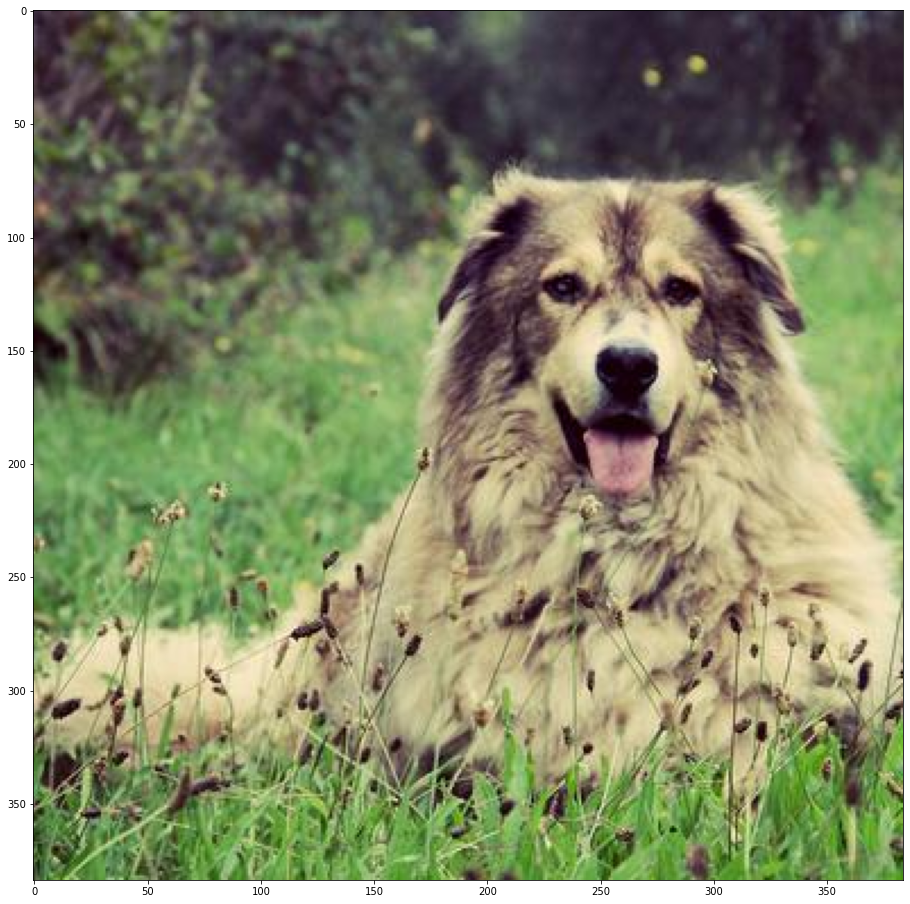

In [ ]:
img_path = '/content/drive/MyDrive/images pjeski/happy/10005733405_81d43d7c81_b.jpg'
filename, ext = os.path.splitext(os.path.basename(img_path))
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(16, 16))
plt.imshow(img)

In [ ]:
height, width = 64, 64

In [ ]:
ds_path = '/content/drive/MyDrive/images pjeski'
def facialazing(img_folder,IMG_HEIGHT, IMG_WIDTH):
  # dirs = os.listdir(path)
  img_data_array=[]
  class_name=[]
  for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
          filename, ext = os.path.splitext(os.path.basename(path))
          image_path= os.path.join(img_folder, dir1,  file)
          img = cv2.imread( image_path, cv2.COLOR_BGR2RGB)
          # img = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
          # img_result = img.copy()
          dets = detector(img, upsample_num_times=1)
          for i, d in enumerate(dets):
            x1, y1 = d.rect.left(), d.rect.top()
            x2, y2 = d.rect.right(), d.rect.bottom()
          
            crop_img = img[y1:y2, x1:x2]
            try:
              crop_img=cv2.resize(crop_img, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
              crop_img=np.array(crop_img)
              crop_img = crop_img.astype('float32')
              crop_img /= 255
            except Exception as e:
              pass 
            img_data_array.append(crop_img)
            class_name.append(dir1)
            # cv2.waitKey(0)
            # img_array.append(crop_img)
        return img_data_array, class_name
     

In [ ]:
relaxed_doggos = facialazing(ds_path, height, width)


In [ ]:
plt.figure(figsize=(16, 16))
# plt.imshow(relaxed_doggos[2])
len(relaxed_doggos[1])

3620

<Figure size 1152x1152 with 0 Axes>

mmod_rectangles[[(184, 67) (326, 208)]]
Detection 0: Left: 184 Top: 67 Right: 326 Bottom: 208 Confidence: 1.0589399337768555


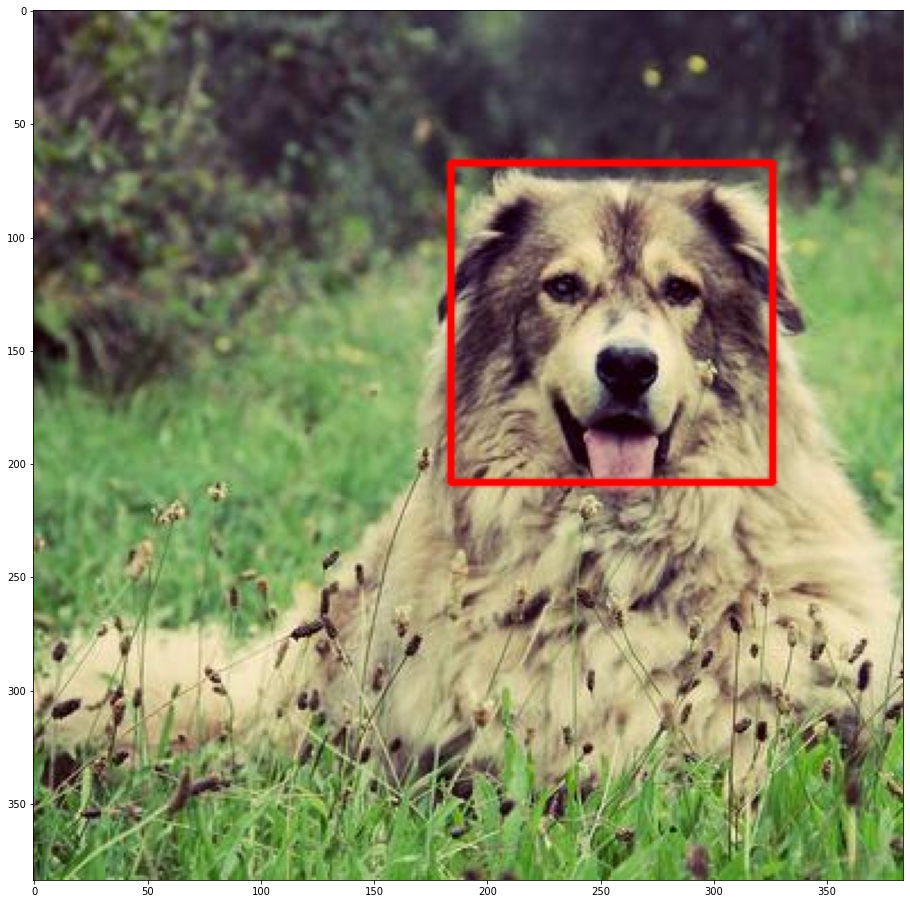

In [ ]:
dets = detector(img, upsample_num_times=1)

print(dets)

img_result = img.copy()

for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))

    x1, y1 = d.rect.left(), d.rect.top()
    x2, y2 = d.rect.right(), d.rect.bottom()

    cv2.rectangle(img_result, pt1=(x1, y1), pt2=(x2, y2), thickness=2, color=(255,0,0), lineType=cv2.LINE_AA)
    
plt.figure(figsize=(16, 16))
plt.imshow(img_result)



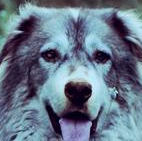

-1

In [ ]:
crop_img = img[y1:y2, x1:x2]
cv2_imshow(crop_img)
cv2.waitKey(0)